## using all articles


In [24]:
import importlib
import information_retrival_pipeline as irp 
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## to reload the library when I have to change something
importlib.reload(irp)

<module 'information_retrival_pipeline' from '/home/erik/uni/graz/semester_3/advanced_information_retrieval/information_retrival_pipeline.py'>

In [ ]:
## read the data
df = pd.read_csv('tagesschau_llm_text_1200_2batch.csv')
df

,index,title,subtitle,content,tags,token_count,bullets,llm_text
0,0,Berlin macht Peking für Cyberangriff verantwor...,"Lange wurde es vermutet, nun ist sich die Bund...",Die Bundesregierung hat chinesische Hacker für...,"['Hackerangriff', 'China', 'Bundesamt für Kart...",883,• Die Bundesregierung hat chinesische Hacker f...,Die Bundesregierung hat chinesische Hacker für...
1,1,SPD plädiert für Wahl Reichinneks in Kontrollg...,Der Bundestag wählt heute die Mitglieder des A...,SPD-Innenexperte Lars Castellucci plädiert and...,"['Geheimdienstkontrolle', 'Linksfraktion', 'Bu...",789,• Der Bundestag wählt heute die Mitglieder des...,Der Bundestag wählt heute die Mitglieder des P...
2,2,Israel meldet Kontrolle über Korridor zu Ägypten,Israel hat nach eigenen Angaben im Gazastreife...,Die israelische Armee hat nach eigenen Angaben...,"['Gazastreifen', 'Israel', 'Nahost']",536,• Die israelische Armee hat die Kontrolle über...,Die israelische Armee hat die Kontrolle über e...
3,3,Kubicki ruft zu Kampfbereitschaft auf,Beim außerordentlichen FDP-Parteitag in Potsda...,Mit einem Aufruf zu Optimismus und Schlagkraft...,"['Bundestagswahl 2025', 'FDP']",816,• Der FDP-Sonderparteitag zur Bundestagswahl i...,Der FDP-Sonderparteitag in Potsdam ist ein wic...
4,5,"Mit Spaghetti, Müsli und Dosenhuhn gegen Trump",Tausende Amerikaner haben in mehreren Städten ...,Die Arme von Laura schmerzen. Die ältere Dame ...,"['USA', 'Trump', 'Protest']",835,"• Die ältere Dame Laura schleppt Lebensmittel,...",In Washington D.C. hat sich eine Gruppe von Ak...
...,...,...,...,...,...,...,...,...
1138,1650,Künstler fordern Ausschluss Israels von Biennale,"Tausende Menschen, unter ihnen viele Künstler,...",Die Liste der Aktivisten gegen eine Teilnahme ...,"['Biennale', 'Israel', 'Venedig', 'Kunst', 'Na...",792,"• Die Initiative ""ANGA"" (Art not Genocide Alli...",Die 60. Internationale Kunstausstellung in Ven...
1139,1651,"Inflation sinkt auf 2,3 Prozent",Die Inflationsrate in Deutschland ist im Janua...,Die deutsche Inflation ist zu Jahresbeginn etw...,"['Inflation', 'Verbraucherpreise', 'Januar']",589,"• Die deutsche Inflation betrug im Januar 2,3 ...",Die deutsche Inflation im Januar 2024 betrug 2...
1140,1652,Israel stoppt humanitäre Hilfe für Gaza,Israel hat den Einlass humanitärer Hilfe in de...,Nach Ende der ersten Phase der Waffenruhe im G...,"['Israel', 'Gazastreifen']",1078,• Israel hat einen vorläufigen Einfuhrstopp in...,Israel hat einen vorläufigen Einfuhrstopp in d...
1141,1653,SPD wirft Kiesewetter Falschinformation vor,"Der CDU-Abgeordnete Kiesewetter behauptet, es ...",Führende SPD-Politiker haben dem CDU-Bundestag...,"['Bundestagswahl 2025', 'Kiesewetter', 'Olaf S...",882,• Roderich Kiesewetter hat falsche Information...,Bundeskanzler Olaf Scholz hat sich gegen falsc...


## Run information retrieval methods

### run bm25

In [ ]:
## extract queries and run bm25
querrys = [ast.literal_eval(q) for q in df['tags']]
results_bm25 = pd.DataFrame()
results_bm25['querry'] = querrys

results_bm25['content'] = irp.bm25('content',querrys,5,df)
results_bm25['llm_text'] = irp.bm25('llm_text',querrys,5,df)
results_bm25


,querry,content,llm_text
0,"[Hackerangriff, China, Bundesamt für Kartograp...","[392, 844, 1124, 1046, 654]","[392, 654, 1034, 844, 1124]"
1,"[Geheimdienstkontrolle, Linksfraktion, Bundest...","[1, 759, 851, 544, 276]","[1, 759, 40, 689, 1133]"
2,"[Gazastreifen, Israel, Nahost]","[793, 1004, 29, 821, 412]","[793, 421, 774, 288, 910]"
3,"[Bundestagswahl 2025, FDP]","[63, 988, 3, 738, 180]","[3, 738, 63, 180, 137]"
4,"[USA, Trump, Protest]","[818, 937, 514, 289, 803]","[647, 603, 832, 935, 530]"
...,...,...,...
1138,"[Biennale, Israel, Venedig, Kunst, Nahost]","[1138, 793, 1126, 718, 1120]","[1138, 793, 421, 274, 874]"
1139,"[Inflation, Verbraucherpreise, Januar]","[1139, 52, 778, 912, 998]","[1139, 52, 912, 782, 393]"
1140,"[Israel, Gazastreifen]","[29, 821, 412, 364, 288]","[774, 288, 910, 29, 234]"
1141,"[Bundestagswahl 2025, Kiesewetter, Olaf Scholz...","[1141, 152, 626, 366, 112]","[1141, 889, 1, 523, 189]"


In [ ]:
#save the results
results_bm25.to_csv('bm25_second_bacth_results_top_5.csv',index=None)

### run bi-encoder and cross-encoder model

In [ ]:
querrys = [ast.literal_eval(q) for q in df['tags']]
results_bi_encoder = pd.DataFrame()
results_bi_encoder['querry'] = querrys
results_bi_encoder['content'] = irp.bi_encoder('content',querrys,15,df)
results_bi_encoder['llm_text'] = irp.bi_encoder('llm_text',querrys,15,df)


### evaluation of the results

##### bm25

In [ ]:
## load data and caluclate metrics
results_bm25_top_5 = pd.read_csv('bm25_second_bacth_results_top_5.csv')
results_bm25_top_5['llm_pos'],results_bm25_top_5['content_pos'] = irp.position_of_article(results_bm25_top_5)
results_bm25_top_5['llm_tag_match'],results_bm25_top_5['content_tag_match'] = irp.number_of_tags_match(results_bm25_top_5)
results_bm25_top_5['llm_tag_match_normelized'],results_bm25_top_5['content_tag_match_normelized'] = irp.number_of_tags_match(results_bm25_top_5,normelized=True)
results_bm25_top_5


    


,querry,content,llm_text,llm_pos,content_pos,llm_tag_match,content_tag_match,llm_tag_match_normelized,content_tag_match_normelized
0,"[Hackerangriff, China, Bundesamt für Kartograp...","[392, 844, 1124, 1046, 654]","[392, 654, 1034, 844, 1124]",-1,-1,6,6,0.589286,0.589286
1,"[Geheimdienstkontrolle, Linksfraktion, Bundest...","[1, 759, 851, 544, 276]","[1, 759, 40, 689, 1133]",1,1,6,6,4.064516,4.064516
2,"[Gazastreifen, Israel, Nahost]","[793, 1004, 29, 821, 412]","[793, 421, 774, 288, 910]",-1,-1,6,6,0.086672,0.090783
3,"[Bundestagswahl 2025, FDP]","[63, 988, 3, 738, 180]","[3, 738, 63, 180, 137]",1,3,7,9,0.581081,0.733108
4,"[USA, Trump, Protest]","[818, 937, 514, 289, 803]","[647, 603, 832, 935, 530]",-1,-1,4,7,0.019344,0.034451
...,...,...,...,...,...,...,...,...,...
1138,"[Biennale, Israel, Venedig, Kunst, Nahost]","[1138, 793, 1126, 718, 1120]","[1138, 793, 421, 274, 874]",1,1,6,6,3.033863,3.029752
1139,"[Inflation, Verbraucherpreise, Januar]","[1139, 52, 778, 912, 998]","[1139, 52, 912, 782, 393]",1,1,9,8,1.877778,1.677778
1140,"[Israel, Gazastreifen]","[29, 821, 412, 364, 288]","[774, 288, 910, 29, 234]",-1,-1,5,6,0.069902,0.105617
1141,"[Bundestagswahl 2025, Kiesewetter, Olaf Scholz...","[1141, 152, 626, 366, 112]","[1141, 889, 1, 523, 189]",1,1,5,4,1.293694,1.193694


discription of position of top 5 without -1


,llm_pos,content_pos
count,680.000000,777.000000
mean,1.767647,1.763192
std,1.177406,1.175582
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,5.000000,5.000000


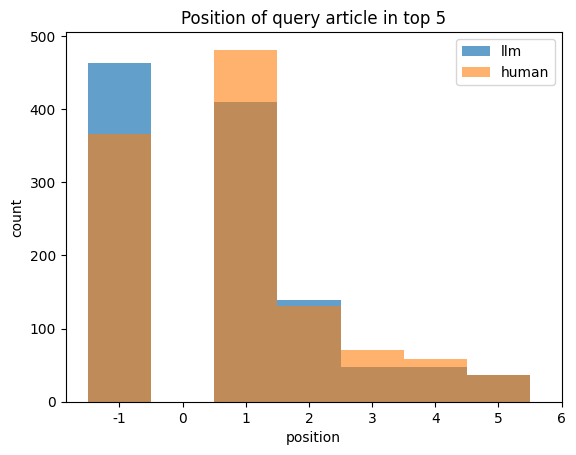

In [ ]:
## plot positon of query article
bins =np.arange(-1,7,1)
plt.hist(results_bm25_top_5['llm_pos'],alpha=0.7, label='llm',bins=bins)
plt.hist(results_bm25_top_5['content_pos'],alpha=0.6,label='human',bins=bins)
plt.title('Position of query article in top 5')
plt.xlabel('position')
plt.ylabel('count')
plt.xticks(bins+0.5,bins)
plt.legend()
print('discription of position of top 5 without -1')
plt.savefig('plots/pos_top_5_bm25.png',transparent=True)
results_bm25_top_5[['llm_pos','content_pos']].replace({-1:np.nan}).describe()


discription of tag match distribution of top 5


,llm_tag_match,content_tag_match
count,1143.000000,1143.000000
mean,6.993876,7.270341
std,3.483380,3.479671
min,0.000000,0.000000
25%,5.000000,5.000000
50%,7.000000,7.000000
75%,9.000000,9.000000
max,26.000000,26.000000


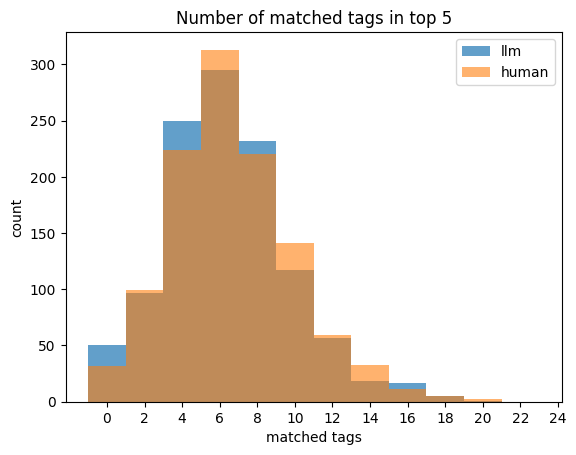

In [ ]:
## plot number of matching tags
bins = np.arange(0,26,2)
plt.hist(results_bm25_top_5['llm_tag_match'],alpha=0.7, label='llm',bins=bins)
plt.hist(results_bm25_top_5['content_tag_match'],alpha=0.6,label='human',bins=bins)
plt.title('Number of matched tags in top 5')
plt.xlabel('matched tags')
plt.ylabel('count')
plt.xticks(bins+1,bins)
plt.legend()
print('discription of tag match distribution of top 5')
plt.savefig('plots/matched_tags_top5_bm25.png',transparent=True)
results_bm25_top_5[['llm_tag_match','content_tag_match']].describe()


discription of Weighted tag match distribution of top 5


,llm_tag_match_normelized,content_tag_match_normelized
count,1143.000000,1143.000000
mean,1.077950,1.189788
std,1.056920,1.072675
min,0.000000,0.000000
25%,0.197049,0.249359
50%,0.868871,1.042926
75%,1.642394,1.833630
max,6.964912,7.083333


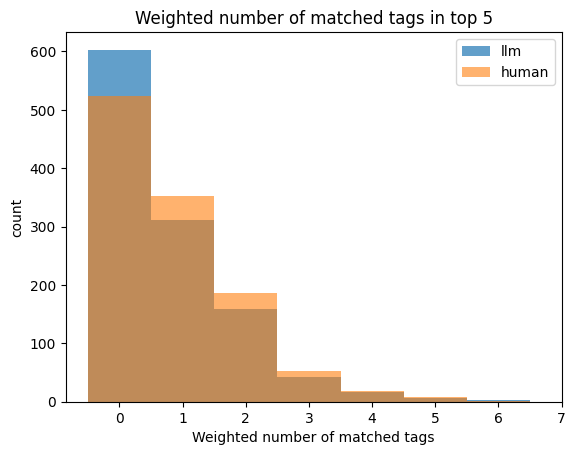

In [ ]:
## plot weighted number of matching tags
bins = np.arange(0,8,1)
plt.hist(results_bm25_top_5['llm_tag_match_normelized'],alpha=0.7, label='llm',bins=bins)
plt.hist(results_bm25_top_5['content_tag_match_normelized'],alpha=0.6,label='human',bins=bins)
plt.title('Weighted number of matched tags in top 5')
plt.xlabel('Weighted number of matched tags')
plt.ylabel('count')
plt.xticks(bins+0.5,bins)
plt.legend()
print('discription of Weighted tag match distribution of top 5')
plt.savefig('plots/matched_tags_weighted_top5_bm25.png',transparent=True)
results_bm25_top_5[['llm_tag_match_normelized','content_tag_match_normelized']].describe()


#### BI encoder

In [ ]:
## load data and calculate metrics
results_bi_ecnoder_top_5 = pd.read_csv('bi_encoder_second_batch_results_top_5.csv')
results_bi_ecnoder_top_5['llm_pos'],results_bi_ecnoder_top_5['content_pos'] = irp.position_of_article(results_bi_ecnoder_top_5)
results_bi_ecnoder_top_5['llm_tag_match'],results_bi_ecnoder_top_5['content_tag_match'] = irp.number_of_tags_match(results_bi_ecnoder_top_5)
results_bi_ecnoder_top_5['llm_tag_match_normelized'],results_bi_ecnoder_top_5['content_tag_match_normelized'] = irp.number_of_tags_match(results_bi_ecnoder_top_5,normelized=True)
results_bi_ecnoder_top_5


    


,Unnamed: 0,querry,content,llm_text,llm_pos,content_pos,llm_tag_match,content_tag_match,llm_tag_match_normelized,content_tag_match_normelized
0,0,"[Hackerangriff, China, Bundesamt für Kartograp...","[0, 576, 392, 471, 382]","[0, 576, 392, 246, 471]",1,1,7,8,2.071429,2.089286
1,1,"[Geheimdienstkontrolle, Linksfraktion, Bundest...","[1, 194, 544, 486, 1133]","[1, 194, 486, 468, 1099]",1,1,5,5,4.032258,4.032258
2,2,"[Gazastreifen, Israel, Nahost]","[1071, 480, 498, 78, 412]","[1071, 61, 1101, 78, 412]",-1,-1,12,11,0.250734,0.187853
3,3,"[Bundestagswahl 2025, FDP]","[466, 889, 851, 563, 3]","[466, 889, 3, 967, 1094]",3,5,4,3,0.304054,0.179054
4,4,"[USA, Trump, Protest]","[289, 542, 430, 640, 83]","[289, 339, 542, 640, 4]",5,-1,9,9,0.539886,0.044123
...,...,...,...,...,...,...,...,...,...,...
1138,1138,"[Biennale, Israel, Venedig, Kunst, Nahost]","[1138, 223, 883, 565, 465]","[1138, 223, 718, 883, 565]",1,1,12,13,3.093368,3.106026
1139,1139,"[Inflation, Verbraucherpreise, Januar]","[1139, 570, 52, 998, 778]","[1139, 570, 52, 998, 778]",1,1,8,8,1.677778,1.677778
1140,1140,"[Israel, Gazastreifen]","[498, 671, 1071, 480, 879]","[556, 671, 1071, 78, 133]",-1,-1,9,8,0.185592,0.149878
1141,1141,"[Bundestagswahl 2025, Kiesewetter, Olaf Scholz...","[889, 158, 681, 903, 563]","[889, 158, 681, 903, 612]",-1,-1,6,6,0.354054,0.314414


discription of position of top 5 without -1


,llm_pos,content_pos
count,934.000000,950.000000
mean,1.650964,1.658947
std,1.072013,1.073436
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,5.000000,5.000000


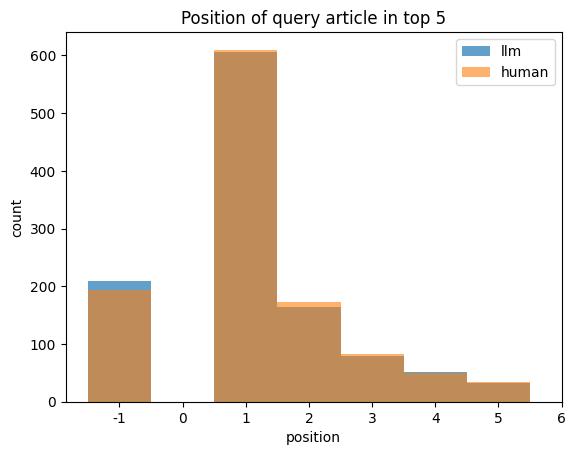

In [ ]:
## plot positon of query article
bins =np.arange(-1,7,1)
plt.hist(results_bi_ecnoder_top_5['llm_pos'],alpha=0.7, label='llm',bins=bins)
plt.hist(results_bi_ecnoder_top_5['content_pos'],alpha=0.6,label='human',bins=bins)
plt.title('Position of query article in top 5')
plt.xlabel('position')
plt.ylabel('count')
plt.xticks(bins+0.5,bins)
plt.legend()
print('discription of position of top 5 without -1')
plt.savefig('plots/pos_top_5_bi_encoder.png',transparent=True)
results_bi_ecnoder_top_5[['llm_pos','content_pos']].replace({-1:np.nan}).describe()


discription of tag match distribution of top 5


,llm_tag_match,content_tag_match
count,1143.000000,1143.000000
mean,7.959755,7.881015
std,3.309508,3.302048
min,0.000000,1.000000
25%,6.000000,6.000000
50%,8.000000,7.000000
75%,10.000000,10.000000
max,27.000000,27.000000


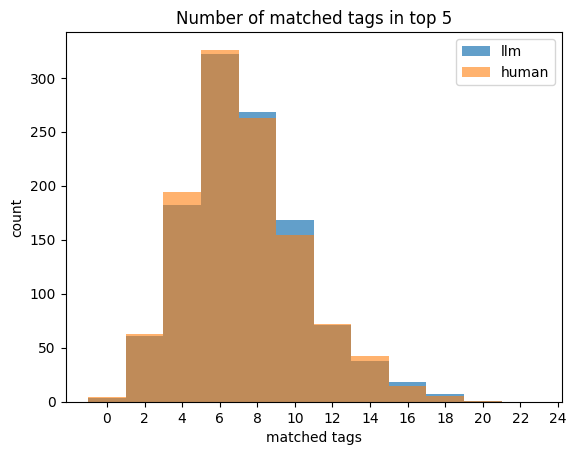

In [ ]:
## plot number of matching tags
min_val = min(results_bi_ecnoder_top_5['llm_tag_match'].min(), results_bi_ecnoder_top_5['content_tag_match'].min())
max_val = max(results_bi_ecnoder_top_5['llm_tag_match'].max(), results_bi_ecnoder_top_5['content_tag_match'].max())

bins = np.arange(0,26,2)

plt.hist(results_bi_ecnoder_top_5['llm_tag_match'],alpha=0.7, label='llm',bins=bins,)
plt.hist(results_bi_ecnoder_top_5['content_tag_match'],alpha=0.6,label='human',bins=bins)
plt.title('Number of matched tags in top 5')
plt.xlabel('matched tags')
plt.ylabel('count')
plt.xticks(bins+1,bins)
plt.legend()
print('discription of tag match distribution of top 5')
plt.savefig('plots/matched_tags_top_5_bi_encoder.png',transparent=True)
results_bi_ecnoder_top_5[['llm_tag_match','content_tag_match']].describe()


discription of Weighted tag match distribution of top 5


,llm_tag_match_normelized,content_tag_match_normelized
count,1143.000000,1143.000000
mean,1.325468,1.338883
std,1.013320,1.013458
min,0.000000,0.016304
25%,0.540634,0.569414
50%,1.131579,1.144291
75%,2.016627,2.016304
max,7.083333,7.464912


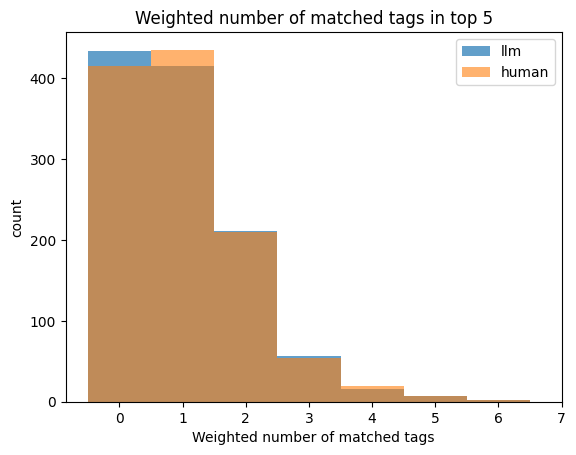

In [ ]:
## plot weighted number of matching tags
min_val = min(results_bi_ecnoder_top_5['llm_tag_match_normelized'].min(), results_bi_ecnoder_top_5['content_tag_match_normelized'].min())
max_val = max(results_bi_ecnoder_top_5['llm_tag_match_normelized'].max(), results_bi_ecnoder_top_5['content_tag_match_normelized'].max())

bins = np.arange(0,8,1)

plt.hist(results_bi_ecnoder_top_5['llm_tag_match_normelized'],alpha=0.7, label='llm',bins=bins)
plt.hist(results_bi_ecnoder_top_5['content_tag_match_normelized'],alpha=0.6,label='human',bins=bins)
plt.title('Weighted number of matched tags in top 5')
plt.xlabel('Weighted number of matched tags')
plt.ylabel('count')
plt.xticks(bins+0.5,bins)
plt.legend()
print('discription of Weighted tag match distribution of top 5')
plt.savefig('plots/matched_tags_weighted_top_5_bi_encoder.png',transparent=True)
results_bi_ecnoder_top_5[['llm_tag_match_normelized','content_tag_match_normelized']].describe()


### analyze the queries

In [ ]:
## load dataset
df = pd.read_csv('bi_encoder_second_batch_results_top_5.csv')
df.querry = [eval(q)for q in df.querry]

In [ ]:
## convert querys to set
df['querry_set'] = [set(q) for q in df.querry]

count    1143.000000
mean        3.358705
std         1.138766
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
dtype: float64

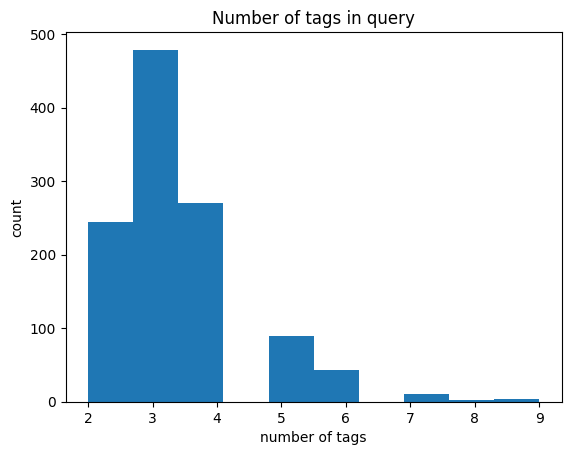

In [ ]:
## plot the num of tags in a query
querry_len = [len(q)for q in df.querry]

plt.hist(querry_len)
plt.title('Number of tags in query')
plt.ylabel('count')
plt.xlabel('number of tags')
pd.Series(querry_len).describe()

count
1    1015
2      32
3      10
4       3
6       1
9       1
7       1
Name: count, dtype: int64

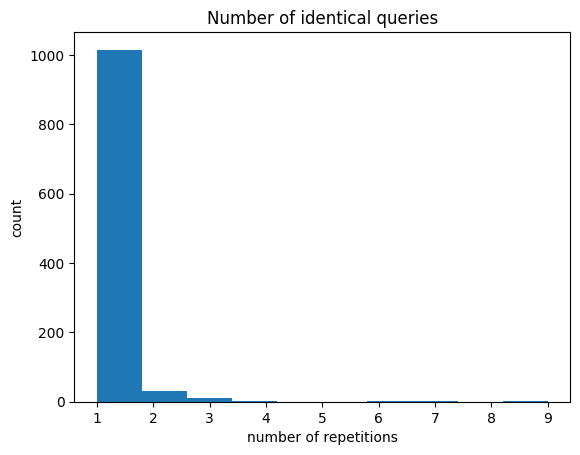

In [ ]:
## plot the valuecounts of queries
plt.hist(df['querry_set'].value_counts())
plt.title('Number of identical queries')
plt.ylabel('count')
plt.xlabel('number of repetitions')
df['querry_set'].value_counts().value_counts()

### using singel corpus

Here we put the llm and humen text in one corpus and performed retrieval tasks based on that. 

In [26]:
from rank_bm25 import BM25Okapi
from typing import Literal
import pandas as pd
from sentence_transformers import SentenceTransformer, CrossEncoder
import torch
import faiss
import numpy as np
from tqdm import tqdm
import importlib
import information_retrival_pipeline as irp

In [43]:
importlib.reload(irp)

<module 'information_retrival_pipeline' from '/home/erik/uni/graz/semester_3/advanced_information_retrieval/information_retrival_pipeline.py'>

#### get results

In [ ]:
## load data and combin in one dataset
df = pd.read_csv('tagesschau_llm_text_1200_2batch.csv')
all_texts = df['content'].to_list()+df['llm_text'].tolist()
ai_label = [0]*len(df)+[1]*len(df)
querrys = df['tags'].to_list()+df['tags'].to_list()
querrys = [eval(q) for q in querrys]
combind_corpus = pd.DataFrame({'content':all_texts,'llm':ai_label,'tags':querrys})


In [ ]:
## sample from dataset to rearange the columns
combind_corpus = combind_corpus.sample(frac=1)
combind_corpus.reset_index(inplace=True)

##### bi encoder

In [57]:
results_bi_en = irp.bi_encoder(modus='content',querrys=combind_corpus['tags'],n=5,df=combind_corpus)

100%|██████████| 2286/2286 [2:47:01<00:00,  4.38s/it]  


In [ ]:
combind_corpus_bi_ecnoder = combind_corpus.copy()
combind_corpus_bi_ecnoder['results'] = results_bi_en

In [ ]:
combind_corpus_bi_ecnoder.to_csv('combined_corpus_bi_encoder.csv',index=None)

##### bm25

In [236]:
results_bm = irp.bm25('content',combind_corpus['tags'],5,combind_corpus)
combind_corpus_bm25 = combind_corpus.copy()
combind_corpus_bm25['results'] = results_bm


In [238]:
combind_corpus_bm25.to_csv('combined_corpus_bm25.cvs',index=None)

#### plot data

In [284]:
combind_corpus_bi_ecnoder = pd.read_csv('combined_corpus_bi_encoder.csv')
combind_corpus_bm25 = pd.read_csv('combined_corpus_bm25.cvs')

In [285]:
def is_ai(id,df):
    return(int(df.loc[id]['llm']))
def results_to_is_ai(results,df):
    return [is_ai(i,df) for i in eval(results)]

In [286]:
combind_corpus_bi_ecnoder

,index,content,llm,tags,results
0,1120,Das Kennedy Center ist ein Kulturzentrum von n...,0,"['USA', 'Kultur', 'Trump']","[1131, 1982, 887, 1971, 366]"
1,2254,Die Energiewende in der EU: Ein Meilenstein au...,1,"['EU', 'Erneuerbare Energien']","[2139, 384, 390, 1, 2137]"
2,1220,Israelischer Angriff auf libanesischen Vorort:...,1,"['Israel', 'Angriff', 'Beirut']","[2189, 2277, 1037, 1475, 988]"
3,1598,Die Diskussion über die Versicherungspolitik u...,1,"['Klimawandel', 'Klimaschäden', 'Versicherung']","[1809, 838, 1757, 1066, 1056]"
4,1037,Nach den Beschwerden von US-Präsident Donald T...,0,"['UN', 'Trump', 'Vollversammlung', 'USA']","[556, 1284, 2201, 535, 1760]"
...,...,...,...,...,...
2281,1188,Die Hisbollah hielt kürzlich eine Pressekonfer...,1,"['Hisbollah', 'Libanon', 'Nahost']","[2269, 1761, 2277, 1475, 896]"
2282,1878,"Nicolas Sarkozy, ehemaliger Präsident Frankrei...",1,"['Sarkozy', 'Gaddafi', 'Frankreich']","[709, 956, 2282, 584, 375]"
2283,1860,Der Schweigegeld-Prozess gegen Donald Trump we...,1,"['Trump', 'Prozess', 'Schweigegeld', 'Stormy D...","[2048, 1392, 2283, 940, 1982]"
2284,983,NATO-Generalsekretär Mark Rutte hat Deutschlan...,0,"['Rutte', 'NATO', 'Rüstungsausgaben']","[674, 2262, 2284, 1305, 1825]"


In [287]:
combind_corpus_bi_ecnoder['is_ai_results'] = [results_to_is_ai(r,combind_corpus_bi_ecnoder) for r in combind_corpus_bi_ecnoder['results']]
combind_corpus_bm25['is_ai_results'] = [results_to_is_ai(r,combind_corpus_bm25) for r in combind_corpus_bm25['results']]

combind_corpus_bi_ecnoder['is_ai_first_result']= [i[0] for i in combind_corpus_bi_ecnoder['is_ai_results']]
combind_corpus_bm25['is_ai_first_result']= [i[0] for i in combind_corpus_bm25['is_ai_results']]

bi_encoder_all_is_ai = [i for j in combind_corpus_bi_ecnoder['is_ai_results'] for i in j]
bm25_all_is_ai = [i for j in combind_corpus_bm25['is_ai_results'] for i in j]


##### bm25

count    2286.000000
mean        0.658793
std         0.474219
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_ai_first_result, dtype: float64

is_ai_first_result
1    1506
0     780
Name: count, dtype: int64

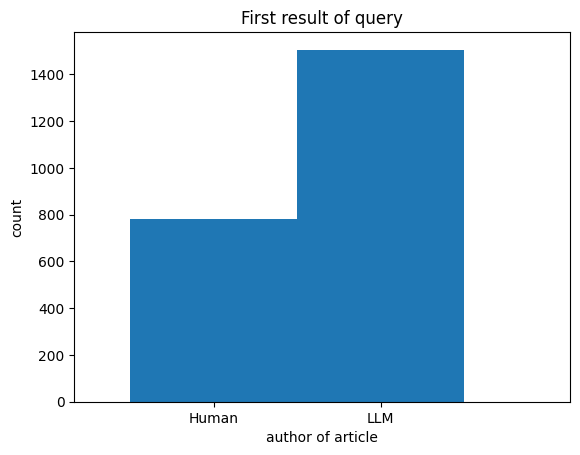

In [288]:
plt.hist(combind_corpus_bm25['is_ai_first_result'],bins=[-0.2,0,1,2,2.5])
plt.xticks(ticks=[0.5,1.5,],labels=['Human','LLM'])
plt.xlabel('author of article')
plt.ylabel('count')
plt.title('First result of query')
plt.savefig('plots/combind_corpus_first_result_top5_bm25.png',transparent=True)
display(combind_corpus_bm25['is_ai_first_result'].describe())
combind_corpus_bm25['is_ai_first_result'].value_counts()




count    11430.000000
mean         0.586352
std          0.492508
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_ai_top_5, dtype: float64

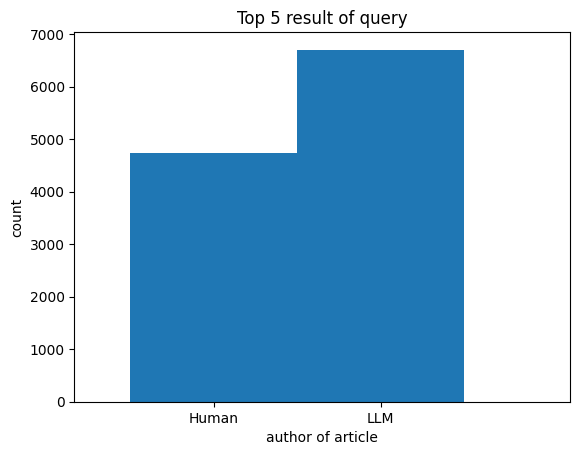

In [283]:
is_ai_all = [y for i in combind_corpus_bm25['is_ai_results'] for y in i]
plt.hist(is_ai_all, bins=[-0.2,0,1,2,2.5])
plt.xticks(ticks=[0.5,1.5,],labels=['Human','LLM'])
plt.xlabel('author of article')
plt.ylabel('count')
plt.title('Top 5 result of query')
plt.savefig('plots/combind_corpus_all_top5_bm25.png',transparent=True)
pd.Series(is_ai_all,name='is_ai_top_5').describe()


#### bi encoder

count    2286.000000
mean        0.832896
std         0.373150
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_ai_first_result, dtype: float64

is_ai_first_result
1    1904
0     382
Name: count, dtype: int64

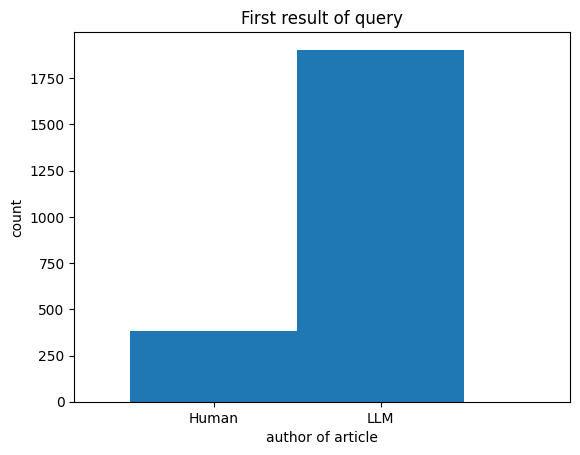

In [289]:
plt.hist(combind_corpus_bi_ecnoder['is_ai_first_result'],bins=[-0.2,0,1,2,2.5])
plt.xticks(ticks=[0.5,1.5,],labels=['Human','LLM'])
plt.xlabel('author of article')
plt.ylabel('count')
plt.title('First result of query')
plt.savefig('plots/combind_corpus_first_result_top5_bi_encoder.png',transparent=True)
display(combind_corpus_bi_ecnoder['is_ai_first_result'].describe())
combind_corpus_bi_ecnoder['is_ai_first_result'].value_counts()



count    11430.000000
mean         0.708311
std          0.454560
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_ai_top_5, dtype: float64

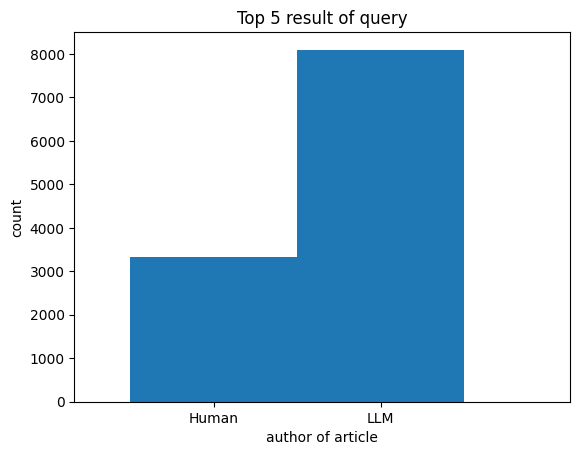

In [281]:
is_ai_all = [y for i in combind_corpus_bi_ecnoder['is_ai_results'] for y in i]
plt.hist(is_ai_all, bins=[-0.2,0,1,2,2.5])
plt.xticks(ticks=[0.5,1.5,],labels=['Human','LLM'])
plt.xlabel('author of article')
plt.ylabel('count')
plt.title('Top 5 result of query')
plt.savefig('plots/combind_corpus_all_top5_bi_encoder.png',transparent=True)

pd.Series(is_ai_all,name='is_ai_top_5').describe()



In [ ]:
['Geheimdienstkontrolle', 'Linksfraktion', 'Bundestag', 'PKGr', 'Parlamentarisches Kontrollgremium']

In [229]:
df.iloc[2]

index                                                          2
title           Israel meldet Kontrolle über Korridor zu Ägypten
subtitle       Israel hat nach eigenen Angaben im Gazastreife...
content        Die israelische Armee hat nach eigenen Angaben...
tags                        ['Gazastreifen', 'Israel', 'Nahost']
token_count                                                  536
bullets        • Die israelische Armee hat die Kontrolle über...
llm_text       Die israelische Armee hat die Kontrolle über e...
Name: 2, dtype: object

In [231]:
articel = 1659
for i in eval(df.iloc[articel]['tags']):#['Geheimdienstkontrolle', 'Linksfraktion', 'Bundestag', 'PKGr', 'Kontrollgremium']:
    llm = df.iloc[articel]['llm_text'].count(i)
    humen = df.iloc[articel]['content'].count(i)
    print(f"{i} llm: {llm}, humen: {humen}")
    

IndexError: single positional indexer is out-of-bounds

In [245]:
combind_corpus_bi_ecnoder

,index,content,llm,tags,results,is_ai_results,is_ai_first_result
0,1120,Das Kennedy Center ist ein Kulturzentrum von n...,0,"['USA', 'Kultur', 'Trump']","[1131, 1982, 887, 1971, 366]","[1, 0, 0, 1, 1]",1
1,2254,Die Energiewende in der EU: Ein Meilenstein au...,1,"['EU', 'Erneuerbare Energien']","[2139, 384, 390, 1, 2137]","[1, 1, 0, 1, 1]",1
2,1220,Israelischer Angriff auf libanesischen Vorort:...,1,"['Israel', 'Angriff', 'Beirut']","[2189, 2277, 1037, 1475, 988]","[0, 1, 1, 0, 0]",0
3,1598,Die Diskussion über die Versicherungspolitik u...,1,"['Klimawandel', 'Klimaschäden', 'Versicherung']","[1809, 838, 1757, 1066, 1056]","[0, 1, 1, 1, 0]",0
4,1037,Nach den Beschwerden von US-Präsident Donald T...,0,"['UN', 'Trump', 'Vollversammlung', 'USA']","[556, 1284, 2201, 535, 1760]","[1, 1, 0, 0, 1]",1
...,...,...,...,...,...,...,...
2281,1188,Die Hisbollah hielt kürzlich eine Pressekonfer...,1,"['Hisbollah', 'Libanon', 'Nahost']","[2269, 1761, 2277, 1475, 896]","[0, 1, 1, 0, 1]",0
2282,1878,"Nicolas Sarkozy, ehemaliger Präsident Frankrei...",1,"['Sarkozy', 'Gaddafi', 'Frankreich']","[709, 956, 2282, 584, 375]","[0, 0, 1, 1, 0]",0
2283,1860,Der Schweigegeld-Prozess gegen Donald Trump we...,1,"['Trump', 'Prozess', 'Schweigegeld', 'Stormy D...","[2048, 1392, 2283, 940, 1982]","[0, 0, 1, 0, 0]",0
2284,983,NATO-Generalsekretär Mark Rutte hat Deutschlan...,0,"['Rutte', 'NATO', 'Rüstungsausgaben']","[674, 2262, 2284, 1305, 1825]","[1, 1, 0, 0, 0]",1


In [233]:
df[df['index']==1659]

,index,title,subtitle,content,tags,token_count,bullets,llm_text


In [255]:
pd.read_csv('tagesschau_summaries_1200_all.csv')

,index,title,subtitle,content,tags,token_count,bullets,summary
0,0,Berlin macht Peking für Cyberangriff verantwor...,"Lange wurde es vermutet, nun ist sich die Bund...",Die Bundesregierung hat chinesische Hacker für...,"['Hackerangriff', 'China', 'Bundesamt für Kart...",883,• Die Bundesregierung hat chinesische Hacker f...,Die Bundesregierung hat chinesische Hacker für...
1,1,SPD plädiert für Wahl Reichinneks in Kontrollg...,Der Bundestag wählt heute die Mitglieder des A...,SPD-Innenexperte Lars Castellucci plädiert and...,"['Geheimdienstkontrolle', 'Linksfraktion', 'Bu...",789,• Der Bundestag wählt heute die Mitglieder des...,Der Bundestag wählt heute die Mitglieder des P...
2,2,Israel meldet Kontrolle über Korridor zu Ägypten,Israel hat nach eigenen Angaben im Gazastreife...,Die israelische Armee hat nach eigenen Angaben...,"['Gazastreifen', 'Israel', 'Nahost']",536,• Die israelische Armee hat die Kontrolle über...,Die israelische Armee hat die Kontrolle über e...
3,3,Kubicki ruft zu Kampfbereitschaft auf,Beim außerordentlichen FDP-Parteitag in Potsda...,Mit einem Aufruf zu Optimismus und Schlagkraft...,"['Bundestagswahl 2025', 'FDP']",816,• Der FDP-Sonderparteitag zur Bundestagswahl i...,Die FDP plant einen einstündigen Sonderparteit...
4,5,"Mit Spaghetti, Müsli und Dosenhuhn gegen Trump",Tausende Amerikaner haben in mehreren Städten ...,Die Arme von Laura schmerzen. Die ältere Dame ...,"['USA', 'Trump', 'Protest']",835,"• Die ältere Dame Laura schleppt Lebensmittel,...","Laura, eine ältere Dame, brachte Lebensmittel,..."
...,...,...,...,...,...,...,...,...
4933,7181,Waffenruhe im Schwarzen Meer - unter Bedingungen,Erst wurden keine Details aus den Verhandlunge...,Bei den Gesprächen über eine Waffenruhe im Kri...,"['USA', 'Russland', 'Ukraine', 'Schwarzes Meer']",1040,• Die ukrainische und russische Regierung habe...,Die ukrainische und russische Regierung haben ...
4934,7182,Mit Zweckoptimismus zurück an den Verhandlungs...,Russland greift die Ukraine weiter an - aber d...,Russland greift die Ukraine weiter an. Jede Na...,"['Ukraine', 'Türkei', 'Verhandlungen', 'Friede...",685,• Russland greift die Ukraine weiterhin mit Dr...,Russland greift die Ukraine weiterhin mit Droh...
4935,7183,"""Nichts über die Ukraine ohne die Ukraine""","Wer wird am Verhandlungstisch sitzen, wenn es ...","Es ist das dritte Jahr, dass der ukrainische P...","['Sicherheitskonferenz München', 'Ukraine', 'R...",1136,• Der ukrainische Präsident Wolodymyr Selensky...,Der ukrainische Präsident Wolodymyr Selenskyj ...
4936,7186,Trump droht Nigeria mit Militäreinsatz,US-Präsident Trump hat Nigerias Regierung mit ...,US-Präsident Donald Trump hat Nigerias Regieru...,"['Trump', 'Nigeria', 'Christen']",518,• US-Präsident Donald Trump hat Nigerias Regie...,US-Präsident Donald Trump hat Nigerias Regieru...
